In [34]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../../../")

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from helpers.split import label_strings, tag_label_feature_split

In [50]:
def experiment(dataset, max_iteration=100):

    # load data and separate one hot encoded labels from features,
    # transform one hot encoded labels into label strings,
    # then encode label strings

    df = pd.read_pickle(dataset)
    _, one_hot_labels, X = tag_label_feature_split(df)
    labels = label_strings(one_hot_labels)

    le = LabelEncoder()
    y = le.fit_transform(pd.Series.ravel(labels))

    # divide into train and test data sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=10, stratify=y
    )

    # standardize features
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)

    # create logistic regression model
    lr = LogisticRegression(
        C=100.0,
        solver="lbfgs",
        multi_class="multinomial",
        class_weight="balanced",
        max_iter=max_iteration,
    )

    lr.fit(X_train_std, y_train)

    predictions = lr.predict(X_test_std)
    accuracy = lr.score(X_test_std, y_test)

    # generate confusion matrix and
    # display nicely with seaborn
    cm = metrics.confusion_matrix(y_test, predictions)
    heatmap_labels = list(le.classes_)
    plt.figure(figsize=(9, 9))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".3f",
        linewidths=0.5,
        square=True,
        cmap="Blues_r",
        xticklabels=heatmap_labels,
        yticklabels=heatmap_labels,
    )
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
    title = os.path.basename(dataset).split(".")[0]
    all_sample_title = f"{title} accuracy: {accuracy:.3f}"
    plt.title(all_sample_title, size=15)

    return

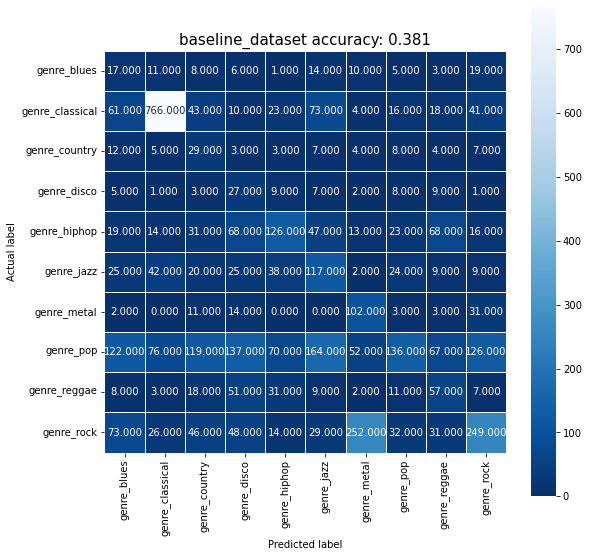

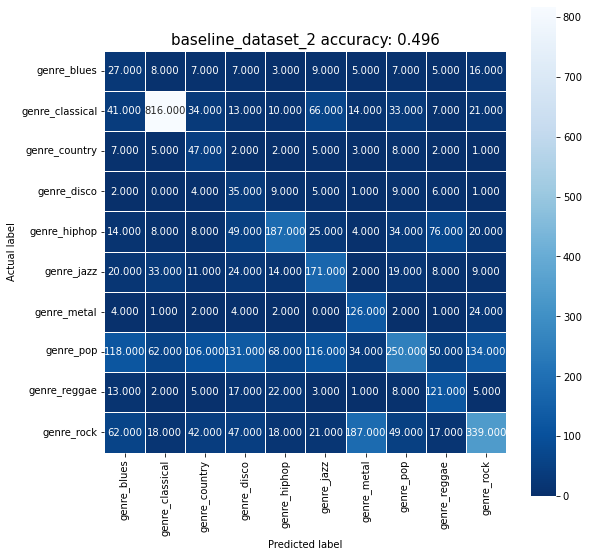

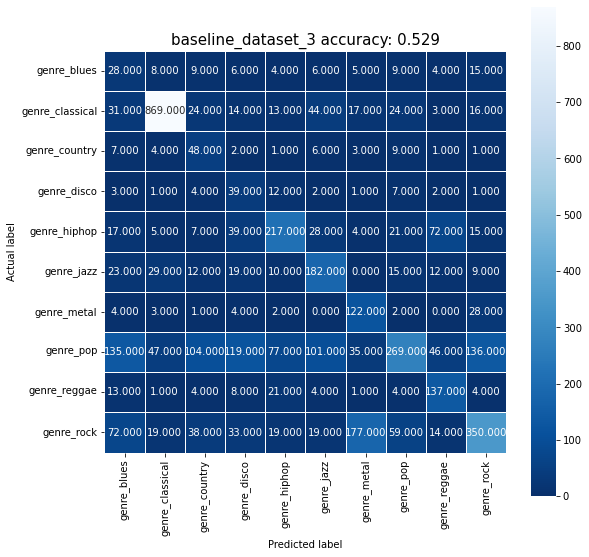

In [52]:
experiment("../../../datasets/baseline_dataset.pickle", 50)
experiment("../../../datasets/baseline_dataset_2.pickle", 300)
experiment("../../../datasets/baseline_dataset_3.pickle", 1800)